[View in Colaboratory](https://colab.research.google.com/github/cristianccq/EDPnumeric/blob/master/2d_wave.ipynb)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

import matplotlib
print(matplotlib.__version__)

2.1.2


In [0]:
dx = 0.1
dy = dx
dt = 0.05
tmin = 0.0 
tmax = 6.0 #simulate time

#rectangler domain
xmin = 0.0
xmax = np.pi
ymin = 0.0
ymax = np.pi

#propagation speed
c = 1.0 
#constant
alpha = (c*dt/dx)**2    # alpha = r**2

nx = int((xmax-xmin)/dx) + 1
ny = int((ymax-ymin)/dy) + 1
nt = int((tmax-tmin)/dt) + 2
print(nx*ny,nt,alpha)

1024 122 0.25


In [0]:
def tridiag(a,b,c,N):
    A = np.zeros([N,N])
    np.fill_diagonal(A[1:,:-1],a)
    np.fill_diagonal(A[:-1,1:],c)
    np.fill_diagonal(A,b)
    return A
#mesh
X = np.linspace(xmin, xmax, nx)
Y = np.linspace(ymin, ymax, ny)
X, Y = np.meshgrid(Y, X)

#solution
u = np.zeros((nt,nx,ny))

In [0]:
#initial data
u_0 = np.exp(-((X-2)**2)*10)*np.exp(-((Y-2)**2)*10)
#np.sin(X)*np.sin(Y)#np.exp(-((X-2)**2)*10)*np.exp(-((Y-2)**2)*10)
g_x = np.zeros((nx,ny))  # velocidad inicial  g_x = du(x,y,0)/dt

u[0] = u_0
u[1] = u[0] + dt * g_x

In [0]:
%%time
B = tridiag(alpha,1-2*alpha,alpha,nx)
#simulation

for t in range(1,nt-1):
    u[t+1] = u[t]@B + B@u[t] - u[t-1]  #el arroba(@) es el producto punto, reemplazar por np.dot
    u[t+1,:,0] = np.zeros(nx)          #  en caso no funciona el arroba
    u[t+1,:,ny-1] = np.zeros(nx)
    u[t+1,0,:] = np.zeros(ny)
    u[t+1,nx-1,:] = np.zeros(ny)

Wall time: 3.01 ms


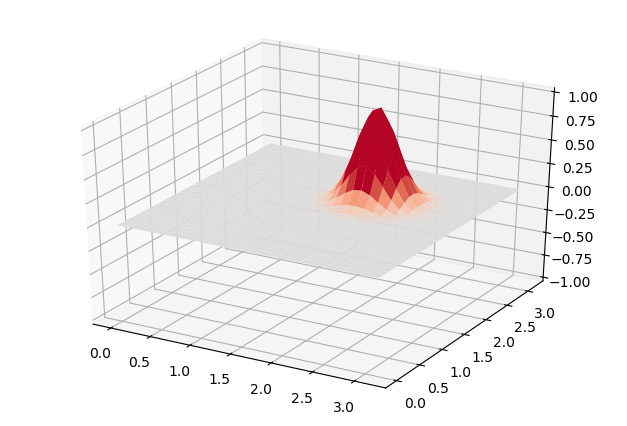

Wall time: 212 ms


In [0]:
%%time
fig = plt.figure()
fig.set_dpi(100)
ax = Axes3D(fig)

def animate(i):
    ax.clear()
    ax.plot_surface(X, Y, u[i], rstride=1, cstride=1, cmap=plt.cm.coolwarm,vmax=0.3,vmin=-0.3)
    ax.set_zlim(-1, 1)
    
anim = FuncAnimation(fig,animate,frames=(nt-1),interval=20,repeat=True)
#anim.save("wave2D01.gif", writer=PillowWriter(fps=60))
plt.show()

In [0]:
from IPython.display import HTML

In [0]:
HTML(anim.to_html5_video())

In [0]:
B

array([[0.5 , 0.25, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.25, 0.5 , 0.25, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.25, 0.5 , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.5 , 0.25, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.25, 0.5 , 0.25],
       [0.  , 0.  , 0.  , ..., 0.  , 0.25, 0.5 ]])

In [0]:
u[0]@B

array([[2.43589912e-34, 1.04034798e-32, 3.62400193e-31, ...,
        1.29036358e-21, 2.02375246e-22, 2.58597168e-23],
       [1.26631650e-32, 5.40831020e-31, 1.88395874e-29, ...,
        6.70803103e-20, 1.05205963e-20, 1.34433260e-21],
       [5.36068060e-31, 2.28949268e-29, 7.97533718e-28, ...,
        2.83970175e-18, 4.45366987e-19, 5.69094512e-20],
       ...,
       [8.50967548e-21, 3.63439667e-19, 1.26602453e-17, ...,
        4.50781200e-08, 7.06986447e-09, 9.03394545e-10],
       [1.14509687e-21, 4.89059336e-20, 1.70361458e-18, ...,
        6.06589688e-09, 9.51349987e-10, 1.21564479e-10],
       [1.25477585e-22, 5.35902126e-21, 1.86678918e-19, ...,
        6.64689701e-10, 1.04247163e-10, 1.33208095e-11]])

In [0]:
u[0].shape

(32, 32)

In [0]:
B.shape

(32, 32)